In [9]:
import scipy.constants as constants

In [14]:
import scipy.integrate as integrate
from scipy.optimize import minimize

print(integrate.quad(lambda x:x**2, 0, 4))
print(minimize(lambda x: abs( (x - 3) ** 3), 5))

(21.333333333333336, 2.368475785867001e-13)
      fun: 1.919341899176372e-09
 hess_inv: array([[63.31829118]])
      jac: array([4.63334556e-06])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 15
     njev: 16
   status: 0
  success: True
        x: array([3.00124275])


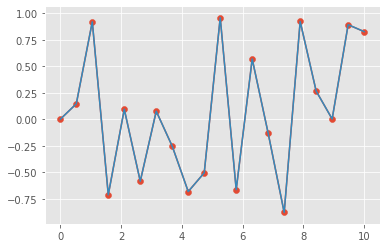

In [26]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


x = np.linspace(0, 10, num=20)
y = np.sin(x ** 3)

plt.scatter(x, y)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
plt.plot(x, f(x))
plt.plot(x, f2(x))

print(f)




In [19]:
!pip install pyaudio

In [27]:
import pyaudio, wave, struct

FORMAT = pyaudio.paInt16  # глубина звука = 16 бит = 2 байта
CHANNELS = 1  # моно
RATE = 48000  # частота дискретизации - кол-во фреймов в секунду
CHUNK = 4000  # кол-во фреймов за один "запрос" к микрофону - тк читаем по кусочкам
RECORD_SECONDS = 2  # длительность записи
WAVE_OUTPUT_FILENAME = "file.wav"

audio = pyaudio.PyAudio()

# открываем поток для чтения данных с устройства записи по умолчанию
# и задаем параметры
stream = audio.open(format=FORMAT, channels=1,
                    rate=RATE, input=True,
                    frames_per_buffer=CHUNK)

print("recording...")

chunks = []  # список байтовых строк

# для каждого "запроса"
for i in range(0, RATE // CHUNK * RECORD_SECONDS):  # RATE // CHUNK - кол-во запросов в секунду
    data = stream.read(CHUNK)  # читаем строку из байт длиной CHUNK * FORMAT = 4000*2 байт
    chunks.append(data)  # добавляем строку в список
print("finished recording")

stream.stop_stream()
stream.close()
audio.terminate()

full_wave = b''.join(chunks)  # склеиваем байт-строки в одну

frames = struct.unpack("@{0}h".format(len(full_wave)//2), full_wave)

recording...
finished recording


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

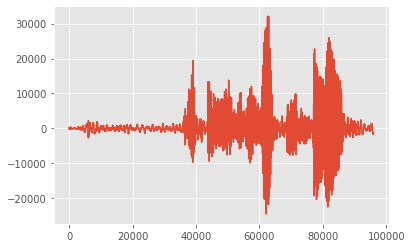

In [28]:
plt.plot(frames)

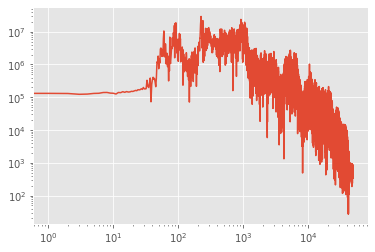

In [29]:
from scipy.fftpack import fft
fig,ax = plt.subplots()
plt.plot(np.abs(fft(frames)[:len(frames)//2]))
ax.set_xscale('log')
ax.set_yscale('log')

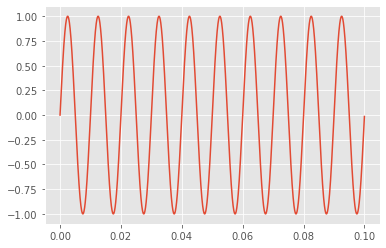

In [30]:
# sampling a sine wave programmatically
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# sampling information
Fs = 44100 # sample rate
T = 1/Fs # sampling period
t = 0.1 # seconds of sampling
N = Fs*t # total points in signal

# signal information
freq = 100 # in hertz, the desired natural frequency
omega = 2*np.pi*freq # angular frequency for sine waves

t_vec = np.arange(N)*T # time vector for plotting
y = np.sin(omega*t_vec)

plt.plot(t_vec,y)
plt.show()

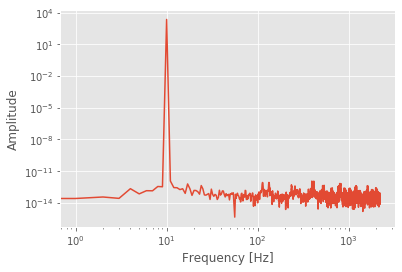

In [31]:
# fourier transform and frequency domain
#
Y_k = fft(y)[0:int(N/2)] # FFT function from numpy
Pxx = np.abs(Y_k) # be sure to get rid of imaginary part

# plotting
fig,ax = plt.subplots()
plt.plot(Pxx)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()

In [64]:
from scipy.optimize import minimize

print(minimize(lambda x:(x+23)**2, x0=5))

      fun: 6.94321161324021e-13
 hess_inv: array([[0.5]])
      jac: array([-1.65161756e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-23.00000083])


In [32]:
from scipy import linalg
A = np.array([[1, 2], [3, 4]])
b = np.array([[5], [6]])

linalg.inv(A).dot(b) 

array([[-4. ],
       [ 4.5]])

In [33]:
np.linalg.solve(A, b)

array([[-4. ],
       [ 4.5]])

In [34]:
import pandas as pd

data = pd.read_csv("beauty 2.csv")

In [35]:
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [36]:
data["wage"].mean()

6.306690476190469

In [42]:
print(len(data[data["black"] == 1]), data[data["black"] == 1]["wage"].mean())
print(len(data[data["black"] == 0]), data[data["black"] == 0]["wage"].mean())

93 5.332150537634408
1167 6.384353041987999


In [43]:
print(len(data[data["female"] == 1]), data[data["female"] == 1]["wage"].mean())
print(len(data[data["female"] == 0]), data[data["female"] == 0]["wage"].mean())

436 4.299357798165136
824 7.3688228155339734


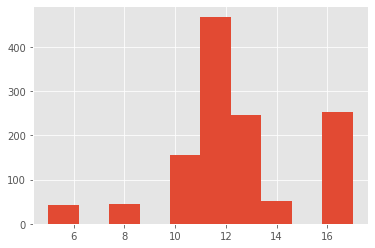

In [44]:
data["educ"].hist()

In [37]:
data["wage"].min()

1.02

In [45]:
data[data["educ"] < 10]["looks"].mean()

4.782906976744185

In [47]:
data[data["educ"] > 15]["looks"].mean()

3.2964426877470356

In [38]:
data["wage"].max()

77.72

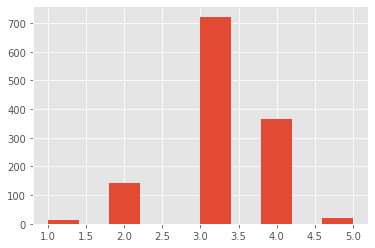

In [48]:
data["looks"].hist()

In [50]:
data[data["looks"] == 5]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
26,14.84,29,0,1,0,0,0,1,13,5
27,19.08,17,0,1,0,0,0,0,17,5
76,23.32,15,0,1,0,0,1,1,17,5
112,6.11,7,0,1,0,1,1,0,12,5
316,3.92,12,0,1,0,0,1,1,12,5
363,10.66,8,0,1,0,0,0,0,13,5
492,2.51,4,0,1,0,1,0,0,12,5
506,4.40,3,0,1,0,1,0,0,13,5
512,5.09,7,0,1,0,1,0,0,17,5
534,3.81,4,0,1,0,0,1,0,12,5


In [51]:
data[data["looks"] == 1]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
28,8.35,41,0,0,0,0,1,1,16,1
200,3.75,36,0,1,0,0,0,0,12,1
248,10.99,40,0,1,0,0,1,0,12,1
327,1.65,24,0,1,0,1,0,1,13,1
751,7.93,39,1,1,0,0,1,0,12,1
837,5.56,10,0,1,0,0,1,0,13,1
842,7.69,9,1,0,0,0,1,0,12,1
877,2.73,41,0,1,0,0,1,0,8,1
980,2.31,35,1,1,0,0,1,0,5,1
1126,3.46,26,0,1,0,1,0,1,5,1


In [60]:
data.iloc[data["wage"].argmax()]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


wage        77.72
exper        9.00
union        1.00
goodhlth     1.00
black        1.00
female       1.00
married      1.00
service      1.00
educ        13.00
looks        4.00
Name: 602, dtype: float64

In [65]:
data.sort_values("wage")[::-1]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3
68,29.98,12,0,1,0,0,1,1,17,3
1113,26.24,37,0,1,0,0,1,0,12,3
1108,26.24,37,0,1,0,0,1,0,12,2
299,26.24,24,0,1,0,0,1,0,12,3
396,26.22,17,0,1,0,0,1,1,17,3


In [70]:
data.corr()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
wage,1.000000,0.234632,0.094529,0.006756,-0.059052,-0.313419,0.184521,-0.053653,0.212333,0.055019
exper,0.234632,1.000000,0.089792,-0.131609,0.007566,-0.247209,0.255607,-0.057328,-0.186200,-0.155035
union,0.094529,0.089792,1.000000,-0.022398,0.031939,-0.100037,0.053629,-0.103633,-0.096022,-0.043495
goodhlth,0.006756,-0.131609,-0.022398,1.000000,-0.034073,-0.039684,-0.013315,0.049947,0.107129,0.058558
black,-0.059052,0.007566,0.031939,-0.034073,1.000000,0.113703,-0.133306,0.017261,-0.138157,0.012098
female,-0.313419,-0.247209,-0.100037,-0.039684,0.113703,1.000000,-0.319228,0.267961,0.009105,0.017129
married,0.184521,0.255607,0.053629,-0.013315,-0.133306,-0.319228,1.000000,-0.075082,-0.047674,-0.064636
service,-0.053653,-0.057328,-0.103633,0.049947,0.017261,0.267961,-0.075082,1.000000,0.301628,0.010213
educ,0.212333,-0.186200,-0.096022,0.107129,-0.138157,0.009105,-0.047674,0.301628,1.000000,0.153842
looks,0.055019,-0.155035,-0.043495,0.058558,0.012098,0.017129,-0.064636,0.010213,0.153842,1.000000


In [90]:
X = data.drop(columns=["looks"])
Y = data["looks"]

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X,Y)
for k, v in zip(list(data.columns[:-1]), model.coef_):
    print ("{} => {}".format(k, v))

print(len(data.columns))
print(len(model.coef_))
print(model.intercept_)

wage => 0.04728329135447314
exper => -0.09336477509642505
union => -0.01967473902978748
goodhlth => 0.019754836891708143
black => 0.02215298566162621
female => -0.0015150990972635269
married => -0.023272231496253522
service => -0.025800356239946063
educ => 0.08363807798369734
10
9
3.1857142857142855


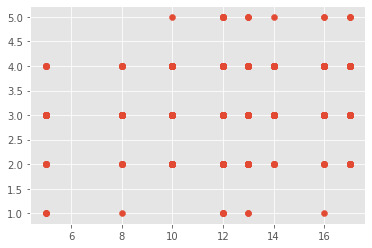

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data['educ'], data['looks'])